In [1]:
#  This is a tutorial code for SLP interface 
from data.SLP_RD import SLP_RD
import utils.vis as vis
import numpy as np
import cv2

In [1]:
# init dataset 
class pseudo_opts:
    SLP_fd = '/scratch/liu.shu/datasets/SLP/danaLab' # give your dataset folder here 
    sz_pch=[256, 256]
    fc_depth = 50
    cov_li = ['uncover']        # give the cover class you want here 

SLP_rd_test = SLP_RD(pseudo_opts, phase='test')  # all test result

# get image, joints and corresponding bounding box, this is frequently used to feed data to the data loader during training. 

idx = 1         # the index you want
RGB, jtA, bbA = SLP_rd_test.get_array_joints(idx_smpl=idx, mod='RGB')
depth, jtB, bbB = SLP_rd_test.get_array_joints(idx_smpl=idx, mod='depth')
phyVec = SLP_rd_test.get_phy(idx=idx)
hA, wA = RGB.shape[:2]
hB, wB = depth.shape[:2] 

# resize for notebook readability 
h = 256 
RGB_rsz = cv2.resize(RGB, (int(wA * h /hA), h))
depth_rsz = cv2.resize(depth, (int(wB * h /hB), h))
depth_rsz_3c = np.stack((depth_rsz,)*3, axis=-1)
img_cb_ori =  np.concatenate([RGB_rsz[...,::-1], depth_rsz_3c], axis=1)
# show the bb of RGB and bbox 

print('the joints of RGB {} is'.format(idx)) 
print(jtA)
print('the bounding box is') 
print(bbA)
print('physical parameters are')
print('weight {},  height {}, gender(1:male, 0:female) {}, bust {},	waist {}, hip {}， right upper arm {}， right lower arm {}， right upper leg {}， right lower leg {}'.format(*phyVec.tolist()))

NameError: name 'SLP_RD' is not defined

show raw RGB and depth images


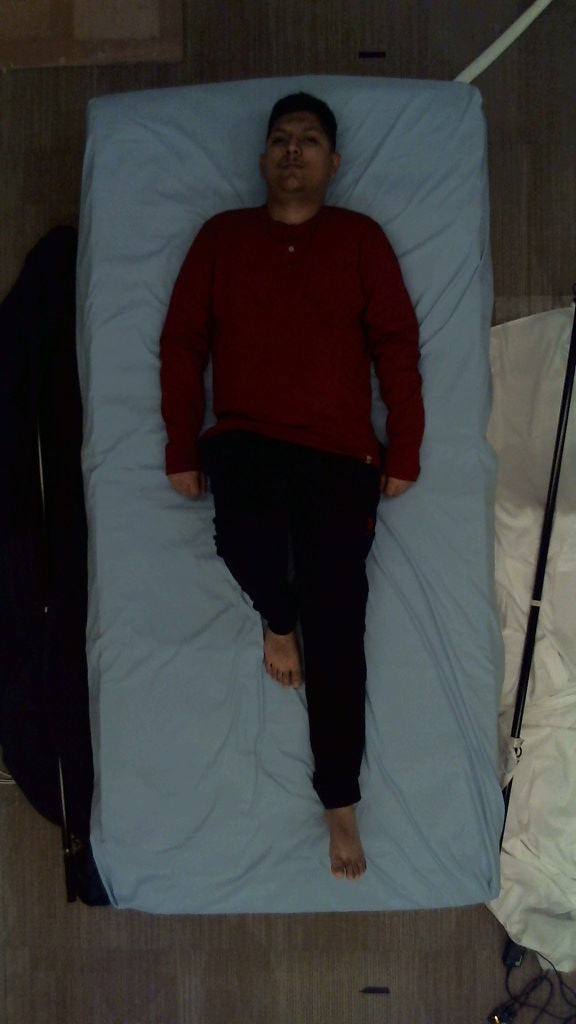

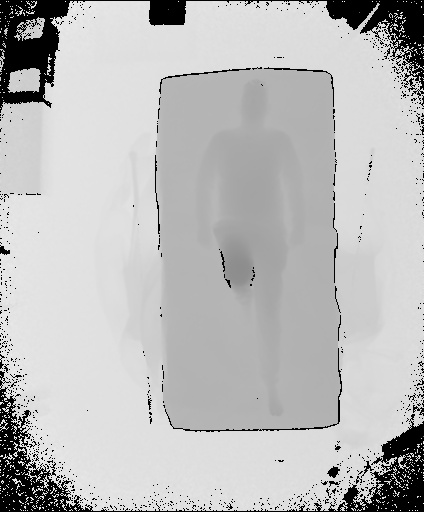

In [5]:
# show raw images  
# print('show raw RGB and depth images')
# vis.ipyth_imshow(RGB_rsz[...,::-1])
# vis.ipyth_imshow(depth_rsz)
print('the orig image pair without align') 
vis.ipyth_imshow(img_cb_ori)

In [ ]:
# align 
# get depth 2 RGB 
print('get aligned image pair') 
depth2RGB = SLP_rd_test.get_array_A2B(idx=idx, modA='depth', modB='RGB')
depth2RGB = cv2.resize(depth2RGB, (int(wA * h /hA), h))
depth2RGB_3c = np.stack((depth2RGB,)*3, axis=-1)
img_cb = np.concatenate([RGB_rsz[...,::-1], depth2RGB_3c], axis=1)
vis.ipyth_imshow(img_cb) 